In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.

In [2]:
#creating a dataframe from the csv file

df = pd.read_csv('H2HBABBA2249.csv')

In [5]:
## Steps TODO

1) Understanding the problem

2) Data Reading

3) Removing the datapoints where the target value is null

4) Preprocess the data

5) Train , validation and test split

6) EDA

7) Feature Engg

8) Feture Selection

9) Modelling

10) HPT

11) Accuracy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

since from the above output we can conclude that there isn't any non-null value in area_business
hence that column can be dropped


In [8]:
df.drop(columns = ['area_business'] , inplace =True)
df.shape

(50000, 18)

In [9]:
#Now checking for null values in the dataframe
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [20]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140104429,COSTCO systems,2019-07-09 00:00:00,2019.0,2.960555e+09,2019-06-17,20190617,20190617,20190704.0,CAD,RV,1.0,64208.44,20190624.0,CA10,2.960555e+09,0
1,U001,0200761734,H E BUT trust,NaN,2020.0,1.930795e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,18387.34,20200417.0,NAA8,1.930795e+09,1
2,U001,0200353024,DECA llc,2019-03-08 00:00:00,2019.0,1.928905e+09,2019-03-05,20190305,20190305,20190311.0,USD,RV,1.0,2790.38,20190301.0,NAM2,1.928905e+09,0
3,U001,200148860,DOLLA llc,2019-07-15 00:00:00,2019.0,1.929559e+09,2019-06-29,20190629,20190629,20190714.0,USD,RV,1.0,14824.32,20190629.0,NAA8,1.929559e+09,0
4,U001,0200435191,C& systems,NaN,2020.0,1.930863e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,29525.84,20200507.0,NAC6,1.930863e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CA02,0140104409,LOB foundation,2019-08-02 00:00:00,2019.0,2.960566e+09,2019-07-18,20190718,20190718,20190728.0,CAD,RV,1.0,294051.12,20190718.0,CA10,2.960566e+09,0
49996,U001,0200315290,KWI associates,NaN,2020.0,1.930625e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,17870.98,20200310.0,NAA8,1.930625e+09,1
49997,U001,0200726025,MARTI associates,2019-10-03 00:00:00,2019.0,1.929925e+09,2019-09-25,20190925,20190925,20191010.0,USD,RV,1.0,21466.20,20190925.0,NAA8,1.929925e+09,0
49998,U001,0200744019,TARG corporation,2020-01-16 00:00:00,2020.0,1.930342e+09,2020-01-01,20200102,20200101,20200116.0,USD,RV,1.0,48672.53,20200101.0,NAA8,1.930342e+09,0


#### Separating the original test_case

In [13]:
df_train = df[df.clear_date.isnull()==False]
real_test = df[df.clear_date.isnull()]

In [ ]:
real_test.to_csv('Real_test.csv')

In [14]:
df_train.shape

(40000, 18)

## Preprocessing

#### Null Imputation

In [19]:
df_train.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                1
isOpen                    0
dtype: int64

In [21]:
df_train[df_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
38832,CA02,0140104225,SAVE-ON- in,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190220,20190302.0,CAD,X2,1.0,3620.16,20190220.0,CA10,NaN,0


In the row abouve the invoice id is missing only because the document_type has changed to X2, guessing invoice_id was not needed in that case, Also we can simply extract that from doc_id (So I consider this is a MNAR case and I see no need to remove this row)

#### Date Time Conversion

In [25]:
df_train['clear_date'] = pd.to_datetime(df_train['clear_date'])
df_train['posting_date'] = pd.to_datetime(df_train['posting_date'])
df_train['document_create_date'] = pd.to_datetime(df_train['document_create_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')

df_train['document_create_date.1'] = pd.to_datetime(df_train['document_create_date.1'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
df_train['due_in_date'] = pd.to_datetime(df_train['due_in_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
df_train['baseline_create_date'] = pd.to_datetime(df_train['baseline_create_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')




Had to use to code below to convert the datatype to date time the above code just changes the string format

In [27]:
df_train['document_create_date'] = pd.to_datetime(df_train['document_create_date'])
df_train['document_create_date.1'] = pd.to_datetime(df_train['document_create_date.1'])
df_train['due_in_date'] = pd.to_datetime(df_train['due_in_date'])
df_train['baseline_create_date'] = pd.to_datetime(df_train['baseline_create_date'])

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  datetime64[ns]
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  posting_id              40000 non-null  float6

#### Constant / Duplicate removal

In [29]:
df_train.duplicated().sum()

859

In [31]:
df_train = df_train.drop_duplicates(keep = 'first')
df_train.shape

(39141, 18)

In [33]:
def detector(col1, col2, df = df_train):
    df['same_Check'] = np.where(df[col1]  == df[col2] ,'True' , 'False' )
    print(df.same_Check.value_counts())
    

Created a function to check similar columns in the dataframe

In [34]:
detector('doc_id','invoice_id')

True     39140
False        1
Name: same_Check, dtype: int64


Completely same except for the one missing value

In [35]:
detector('posting_date','document_create_date.1')

True     39140
False        1
Name: same_Check, dtype: int64


Completely same except for the one missing values another issue where doc_type is X2

#To verify

In [37]:
df_train.drop(df_train[df_train['invoice_id'].isnull()== False].index)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,same_Check
38832,CA02,0140104225,SAVE-ON- in,2019-05-02,2019.0,9.500000e+09,2019-03-29,2019-03-29,2019-02-20,2019-03-02,CAD,X2,1.0,3620.16,2019-02-20,CA10,NaN,0,False


Since it's the only one row where posting date and documnent create date differs and the difference is also big, so i am removing this row to avoid any outlier situation

In [39]:
df_train.drop(df_train[df_train['document type']=='X2'].index , inplace = True)

In [40]:
detector('doc_id','invoice_id')

True    39140
Name: same_Check, dtype: int64


In [41]:
# dropping the duplicate columns

df_train.drop(columns = ['invoice_id', 'document_create_date.1' ] , inplace =True)
df_train.shape

(39140, 17)

#### Constant columns

Checking constant and categorical columns

In [43]:
for col in main_train.columns:
    if main_train[col].nunique()<= 12:
        print(main_train[col].value_counts())
        print('#########################')

U001    36109
CA02     3240
U013      521
U002      120
U005        9
U007        1
Name: business_code, dtype: int64
#########################
2019.0    34906
2020.0     5094
Name: buisness_year, dtype: int64
#########################
USD    36760
CAD     3240
Name: invoice_currency, dtype: int64
#########################
RV    39999
X2        1
Name: document type, dtype: int64
#########################
1.0    40000
Name: posting_id, dtype: int64
#########################
0    40000
Name: isOpen, dtype: int64
#########################


In [44]:
# dropping the constant and quasi constant columns

df_train.drop(columns = ['isOpen', 'posting_id', 'document type' ] , inplace =True)
df_train.shape

(39140, 14)

In [46]:
# clubbing Airlines with low occurance in dataset - to ensure model gets max information
df_train['business_code'] = np.where(df_train['business_code'].isin(['U005' , 'U007']),"Others",df_train['business_code'])

In [49]:
df_train.cust_number.value_counts()

0200769623    8635
0200726979    1537
0200762301    1182
0200759878    1069
0200794332     855
              ... 
200720419        1
100012638        1
0100036470       1
0200231309       1
0100037492       1
Name: cust_number, Length: 1330, dtype: int64

In [53]:
df_train['cust_number'].value_counts()[(df_train['cust_number'].value_counts()<7)]

0140106224    6
0200743618    6
0200375138    6
0100049079    6
0200172815    6
             ..
200720419     1
100012638     1
0100036470    1
0200231309    1
0100037492    1
Name: cust_number, Length: 914, dtype: int64

#### Creating a copy of datframe for checkpoint

#### Checkpoint 1

In [54]:
df_cp1 = df_train.drop('name_customer', axis=1)

In [56]:
values_less_than_7 = df_train['cust_number'].value_counts()[(df_train['cust_number'].value_counts()<7)].index
df_train.cust_number = df_train['cust_number'].apply(lambda x: 'other' if x in values_less_than_7 else x)

##selecting  customers name where transactions are greater than 7 or equal to 7  and taking rest as 'other'

In [60]:
df_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,same_Check
0,CA02,0140104429,COSTCO systems,2019-07-09,2019.0,2.960555e+09,2019-06-17,2019-06-17,2019-07-04,CAD,64208.44,2019-06-24,CA10,True
2,U001,0200353024,DECA llc,2019-03-08,2019.0,1.928905e+09,2019-03-05,2019-03-05,2019-03-11,USD,2790.38,2019-03-01,NAM2,True
3,U001,200148860,DOLLA llc,2019-07-15,2019.0,1.929559e+09,2019-06-29,2019-06-29,2019-07-14,USD,14824.32,2019-06-29,NAA8,True
5,U001,0200726979,BJ'S corporation,2019-04-18,2019.0,1.929070e+09,2019-04-03,2019-04-02,2019-04-18,USD,409.51,2019-04-03,NAA8,True
6,U001,200794332,COST llc,2019-07-10,2019.0,1.929539e+09,2019-06-26,2019-06-25,2019-07-11,USD,86061.69,2019-06-26,NAAX,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200744019,TARG corporation,2019-04-12,2019.0,1.929039e+09,2019-03-29,2019-03-27,2019-04-13,USD,1161.97,2019-03-29,NAA8,True
49995,CA02,0140104409,LOB foundation,2019-08-02,2019.0,2.960566e+09,2019-07-18,2019-07-18,2019-07-28,CAD,294051.12,2019-07-18,CA10,True
49997,U001,0200726025,MARTI associates,2019-10-03,2019.0,1.929925e+09,2019-09-25,2019-09-25,2019-10-10,USD,21466.20,2019-09-25,NAA8,True
49998,U001,0200744019,TARG corporation,2020-01-16,2020.0,1.930342e+09,2020-01-01,2020-01-02,2020-01-16,USD,48672.53,2020-01-01,NAA8,True


In [61]:
##dropping the same_check column used earlier
df_train.drop(columns = ['same_Check'] ,axis = 1, inplace =True)

In [62]:
df_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,CA02,0140104429,COSTCO systems,2019-07-09,2019.0,2.960555e+09,2019-06-17,2019-06-17,2019-07-04,CAD,64208.44,2019-06-24,CA10
2,U001,0200353024,DECA llc,2019-03-08,2019.0,1.928905e+09,2019-03-05,2019-03-05,2019-03-11,USD,2790.38,2019-03-01,NAM2
3,U001,200148860,DOLLA llc,2019-07-15,2019.0,1.929559e+09,2019-06-29,2019-06-29,2019-07-14,USD,14824.32,2019-06-29,NAA8
5,U001,0200726979,BJ'S corporation,2019-04-18,2019.0,1.929070e+09,2019-04-03,2019-04-02,2019-04-18,USD,409.51,2019-04-03,NAA8
6,U001,200794332,COST llc,2019-07-10,2019.0,1.929539e+09,2019-06-26,2019-06-25,2019-07-11,USD,86061.69,2019-06-26,NAAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200744019,TARG corporation,2019-04-12,2019.0,1.929039e+09,2019-03-29,2019-03-27,2019-04-13,USD,1161.97,2019-03-29,NAA8
49995,CA02,0140104409,LOB foundation,2019-08-02,2019.0,2.960566e+09,2019-07-18,2019-07-18,2019-07-28,CAD,294051.12,2019-07-18,CA10
49997,U001,0200726025,MARTI associates,2019-10-03,2019.0,1.929925e+09,2019-09-25,2019-09-25,2019-10-10,USD,21466.20,2019-09-25,NAA8
49998,U001,0200744019,TARG corporation,2020-01-16,2020.0,1.930342e+09,2020-01-01,2020-01-02,2020-01-16,USD,48672.53,2020-01-01,NAA8


In [63]:
df_train.cust_payment_terms.value_counts()

NAA8    15664
NAH4    10292
CA10     3093
NAC6     1345
NAM4     1094
NAAX      926
NAD1      765
NAG2      733
NAU5      723
NAGD      602
NA32      597
NAX2      563
NAM2      437
NA10      323
NAD5      269
NAM1      232
NAVE      212
NAVF      209
NAAW      187
NAVQ      108
NAWU      101
NAWN       73
NAWP       70
NAVR       63
NAUZ       52
NAVM       44
NA3B       39
NACB       34
CA30       31
NABG       28
NA38       23
NAD4       21
NAVL       16
C106       16
NAB1       15
NAVD       12
NAUP       10
NA84       10
NA9X       10
NAM3       10
NA3F        8
NA8Q        6
CAX2        5
BR56        5
NANC        4
NAWM        4
NA25        3
NATX        3
B052        3
NAUX        3
NATJ        3
B112        3
NATU        3
NA31        3
CAB1        3
BR12        3
NATW        3
NAVC        3
NAD8        2
CA60        2
NATH        2
NAUW        2
NAUI        2
NATL        2
NAWK        1
B030        1
NABD        1
NAV2        1
NATK        1
NAV9        1
NATZ        1
NATV  

In [64]:
values_less_than_10 = df_train['cust_payment_terms'].value_counts()[(df_train['cust_payment_terms'].value_counts()<10)].index
df_train.cust_payment_terms = df_train['cust_payment_terms'].apply(lambda x: 'other' if x in values_less_than_10 else x)

##selecting  customers payment terms used for more than name where transactions are greater than  or equal to 10 times and taking rest as 'other'

In [65]:
df_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,CA02,0140104429,COSTCO systems,2019-07-09,2019.0,2.960555e+09,2019-06-17,2019-06-17,2019-07-04,CAD,64208.44,2019-06-24,CA10
2,U001,0200353024,DECA llc,2019-03-08,2019.0,1.928905e+09,2019-03-05,2019-03-05,2019-03-11,USD,2790.38,2019-03-01,NAM2
3,U001,200148860,DOLLA llc,2019-07-15,2019.0,1.929559e+09,2019-06-29,2019-06-29,2019-07-14,USD,14824.32,2019-06-29,NAA8
5,U001,0200726979,BJ'S corporation,2019-04-18,2019.0,1.929070e+09,2019-04-03,2019-04-02,2019-04-18,USD,409.51,2019-04-03,NAA8
6,U001,200794332,COST llc,2019-07-10,2019.0,1.929539e+09,2019-06-26,2019-06-25,2019-07-11,USD,86061.69,2019-06-26,NAAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200744019,TARG corporation,2019-04-12,2019.0,1.929039e+09,2019-03-29,2019-03-27,2019-04-13,USD,1161.97,2019-03-29,NAA8
49995,CA02,0140104409,LOB foundation,2019-08-02,2019.0,2.960566e+09,2019-07-18,2019-07-18,2019-07-28,CAD,294051.12,2019-07-18,CA10
49997,U001,0200726025,MARTI associates,2019-10-03,2019.0,1.929925e+09,2019-09-25,2019-09-25,2019-10-10,USD,21466.20,2019-09-25,NAA8
49998,U001,0200744019,TARG corporation,2020-01-16,2020.0,1.930342e+09,2020-01-01,2020-01-02,2020-01-16,USD,48672.53,2020-01-01,NAA8


#### Normalising the total_amount 

By performing currency conversion

In [67]:
df_train['total_open_amount'] = np.where(df_train['invoice_currency'] == 'CAD',df_train['total_open_amount'] *0.814 ,
                                           df_train['total_open_amount'])

In [73]:
df_train['Target']  = (df_train['clear_date'] - df_train['due_in_date']).dt.days
df_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Target
0,CA02,0140104429,COSTCO systems,2019-07-09,2019.0,2.960555e+09,2019-06-17,2019-06-17,2019-07-04,CAD,52265.67016,2019-06-24,CA10,5
2,U001,0200353024,DECA llc,2019-03-08,2019.0,1.928905e+09,2019-03-05,2019-03-05,2019-03-11,USD,2790.38000,2019-03-01,NAM2,-3
3,U001,200148860,DOLLA llc,2019-07-15,2019.0,1.929559e+09,2019-06-29,2019-06-29,2019-07-14,USD,14824.32000,2019-06-29,NAA8,1
5,U001,0200726979,BJ'S corporation,2019-04-18,2019.0,1.929070e+09,2019-04-03,2019-04-02,2019-04-18,USD,409.51000,2019-04-03,NAA8,0
6,U001,200794332,COST llc,2019-07-10,2019.0,1.929539e+09,2019-06-26,2019-06-25,2019-07-11,USD,86061.69000,2019-06-26,NAAX,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200744019,TARG corporation,2019-04-12,2019.0,1.929039e+09,2019-03-29,2019-03-27,2019-04-13,USD,1161.97000,2019-03-29,NAA8,-1
49995,CA02,0140104409,LOB foundation,2019-08-02,2019.0,2.960566e+09,2019-07-18,2019-07-18,2019-07-28,CAD,239357.61168,2019-07-18,CA10,5
49997,U001,0200726025,MARTI associates,2019-10-03,2019.0,1.929925e+09,2019-09-25,2019-09-25,2019-10-10,USD,21466.20000,2019-09-25,NAA8,-7
49998,U001,0200744019,TARG corporation,2020-01-16,2020.0,1.930342e+09,2020-01-01,2020-01-02,2020-01-16,USD,48672.53000,2020-01-01,NAA8,0


# Milestone - 1 achieved

## Data Spliting

In [75]:
#Now will sort the dataframe w.r.t. posting date

df_train.sort_values(by = 'posting_date' , inplace =True)

In [76]:
df_train.reset_index(drop= True, inplace =True)

In [77]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = df_train.drop('Target',axis=1)

# y --> contains only the target value 
y = df_train['Target']

#### Splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [79]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [80]:
X_train.shape , X_val.shape , X_test.shape

((27398, 13), (5871, 13), (5871, 13))

## EDA

<AxesSubplot:xlabel='Target', ylabel='Density'>

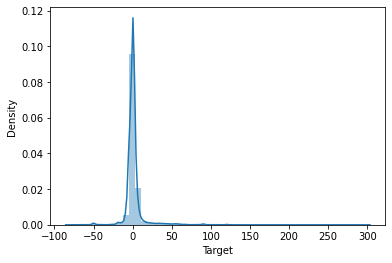

In [81]:
sns.distplot(y_train)

In [82]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Target
0,0,U001,0200721222,GO foundation,2019-01-14,2019.0,1.928536e+09,2018-12-30,2018-12-29,2019-01-14,USD,105902.03,2018-12-30,NAA8,0
1,1,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,20188.83,2018-12-30,NAH4,-5
2,2,U001,0200761734,H E BUT corp,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,15619.87,2018-12-30,NAA8,1
3,3,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,602.85,2018-12-30,NAH4,1
4,4,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,40152.53,2018-12-30,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,27393,U001,0200759878,SA corporation,2019-10-22,2019.0,1.929973e+09,2019-10-06,2019-10-05,2019-10-21,USD,48896.10,2019-10-06,NAH4,1
27394,27394,U001,0200726979,BJ'S corp,2019-10-21,2019.0,1.929974e+09,2019-10-06,2019-10-05,2019-10-21,USD,319.93,2019-10-06,NAA8,0
27395,27395,U013,other,GLOBA in,2019-10-31,2019.0,1.991832e+09,2019-10-06,2019-10-02,2019-11-05,USD,1288.99,2019-10-06,NAVE,-5
27396,27396,U001,0200726979,BJ'S co,2019-10-21,2019.0,1.929974e+09,2019-10-06,2019-10-05,2019-10-21,USD,389.52,2019-10-06,NAA8,0


<AxesSubplot:xlabel='Target', ylabel='total_open_amount'>

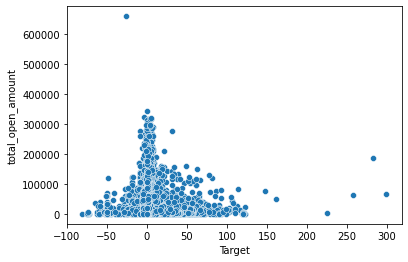

In [83]:

sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="total_open_amount")

In [84]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200721222,GO foundation,2019-01-14,2019.0,1.928536e+09,2018-12-30,2018-12-29,2019-01-14,USD,105902.03,2018-12-30,NAA8
1,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,20188.83,2018-12-30,NAH4
2,U001,0200761734,H E BUT corp,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,15619.87,2018-12-30,NAA8
3,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,602.85,2018-12-30,NAH4
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,40152.53,2018-12-30,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,U001,0200759878,SA corporation,2019-10-22,2019.0,1.929973e+09,2019-10-06,2019-10-05,2019-10-21,USD,48896.10,2019-10-06,NAH4
27394,U001,0200726979,BJ'S corp,2019-10-21,2019.0,1.929974e+09,2019-10-06,2019-10-05,2019-10-21,USD,319.93,2019-10-06,NAA8
27395,U013,other,GLOBA in,2019-10-31,2019.0,1.991832e+09,2019-10-06,2019-10-02,2019-11-05,USD,1288.99,2019-10-06,NAVE
27396,U001,0200726979,BJ'S co,2019-10-21,2019.0,1.929974e+09,2019-10-06,2019-10-05,2019-10-21,USD,389.52,2019-10-06,NAA8


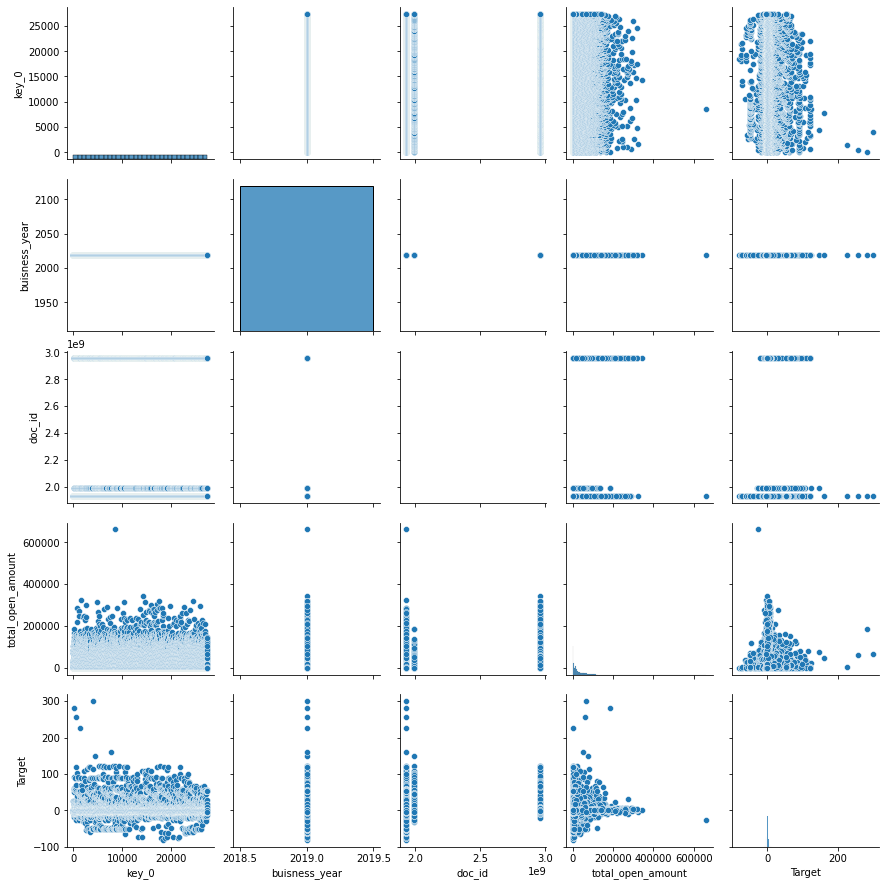

In [89]:
sns.pairplot(data=X_train.merge(y_train,on = X_train.index))

In [90]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Target
0,0,U001,0200721222,GO foundation,2019-01-14,2019.0,1.928536e+09,2018-12-30,2018-12-29,2019-01-14,USD,105902.03,2018-12-30,NAA8,0
1,1,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,20188.83,2018-12-30,NAH4,-5
2,2,U001,0200761734,H E BUT corp,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,USD,15619.87,2018-12-30,NAA8,1
3,3,U001,0200769623,WAL-MAR corp,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,USD,602.85,2018-12-30,NAH4,1
4,4,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,USD,40152.53,2018-12-30,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,27393,U001,0200759878,SA corporation,2019-10-22,2019.0,1.929973e+09,2019-10-06,2019-10-05,2019-10-21,USD,48896.10,2019-10-06,NAH4,1
27394,27394,U001,0200726979,BJ'S corp,2019-10-21,2019.0,1.929974e+09,2019-10-06,2019-10-05,2019-10-21,USD,319.93,2019-10-06,NAA8,0
27395,27395,U013,other,GLOBA in,2019-10-31,2019.0,1.991832e+09,2019-10-06,2019-10-02,2019-11-05,USD,1288.99,2019-10-06,NAVE,-5
27396,27396,U001,0200726979,BJ'S co,2019-10-21,2019.0,1.929974e+09,2019-10-06,2019-10-05,2019-10-21,USD,389.52,2019-10-06,NAA8,0


In [94]:
X_train.name_customer.nunique()

3356

In [96]:
X_train.merge(y_train,on = X_train.index).groupby(['cust_number','name_customer'])['Target'].agg(['min']).unstack().T.idxmin()

cust_number
0100000222        (min, SMITHFIE systems)
0100001196               (min, DOLLAR us)
0100004536               (min, BAS trust)
0100006311          (min, QUALITY C corp)
0100007796               (min, UNITE llc)
                         ...             
CCCA02                   (min, KRAFT  us)
CCU001                   (min, KRAFT  us)
CCU002        (min, KRFT FDS corporation)
CCU013                (min, KRAFT F corp)
other                       (min, OVERH )
Length: 417, dtype: object

In [98]:
X_train.merge(y_train,on = X_train.index).groupby(['cust_number','name_customer'])['Target'].agg(['max']).unstack().T.idxmax()

cust_number
0100000222               (max, SMITHFIE )
0100001196               (max, DOLLAR co)
0100004536               (max, BAS trust)
0100006311    (max, QUALITY C associates)
0100007796           (max, UNITE systems)
                         ...             
CCCA02                 (max, KRAFT  corp)
CCU001                (max, KRAFT  trust)
CCU002                 (max, KRFT FDS co)
CCU013          (max, KRAFT F foundation)
other                     (max, CRUMB in)
Length: 417, dtype: object

#### Checkpoint 2

In [143]:
X_train_cp2 = X_train.drop('clear_date')
X_val_cp2= X_val.drop('clear_date')
X_test_cp2 = X_test.drop('clear_date')

In [ ]:
####### Below code can be use to match and replace similar names within name_customer column

## Feature Engineering

In [124]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27398 non-null  object        
 1   cust_number           27398 non-null  object        
 2   buisness_year         27398 non-null  float64       
 3   doc_id                27398 non-null  float64       
 4   posting_date          27398 non-null  datetime64[ns]
 5   document_create_date  27398 non-null  datetime64[ns]
 6   due_in_date           27398 non-null  datetime64[ns]
 7   invoice_currency      27398 non-null  object        
 8   total_open_amount     27398 non-null  float64       
 9   baseline_create_date  27398 non-null  datetime64[ns]
 10  cust_payment_terms    27398 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 2.5+ MB


In [118]:
# function will delete a column from train , val and test
def wiper(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [125]:
#dropping name_customer as cust_number is more better choice(since there are some string miss match in name_customer)
#dropping clear_date as it's target XD
#dropping business_year --- constant
#dropping doc_id(unique for every single column--- thus not a good feature)

cols = ['name_customer', 'clear_date', 'buisness_year', 'doc_id']
for col in cols:
    wiper(col)

In [132]:
#A function to check shape of all thre dataframes

def vision(x = X_train, y = X_val, z = X_test ):
    return x.shape, y.shape, z.shape
vision()

((27398, 12), (5871, 12), (5871, 12))

In [127]:
#difference betweene dates

X_train['dif_pos_base'] = (X_train['posting_date'] - X_train['baseline_create_date']).dt.days
X_train['dif_pos_doc'] = (X_train['posting_date'] - X_train['document_create_date']).dt.days
X_train['days_given'] = (X_train['due_in_date'] - X_train['posting_date']).dt.days

X_val['dif_pos_base'] = (X_val['posting_date'] - X_val['baseline_create_date']).dt.days
X_val['dif_pos_doc'] = (X_val['posting_date'] - X_val['document_create_date']).dt.days
X_val['days_given'] = (X_val['due_in_date'] - X_val['posting_date']).dt.days


X_test['dif_pos_base'] = (X_test['posting_date'] - X_test['baseline_create_date']).dt.days
X_test['dif_pos_doc'] = (X_test['posting_date'] - X_test['document_create_date']).dt.days
X_test['days_given'] = (X_test['due_in_date'] - X_test['posting_date']).dt.days

In [133]:
vision()

((27398, 12), (5871, 12), (5871, 12))

#### Checkpoint 3 

###### This time i am going to use features  for date as integers, next time i will try categorizing them if this doesn't work well

In [152]:
#added and dropped a dummy column to save checkpoint

X_train_cp3 = X_train.drop('sam' , axis =1)
X_val_cp2= X_val.drop('sam' , axis =1)
X_test_cp2 = X_test.drop('sam' , axis =1)

'= X_train\nX_val_cp2= X_val\nX_test_cp2 = X_test'

In [134]:
#extract day,month and year of due_in_date

X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['quarter_of_due'] = X_train['due_in_date'].dt.quarter

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['quarter_of_due'] = X_val['due_in_date'].dt.quarter


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['quarter_of_due'] = X_test['due_in_date'].dt.quarter

In [135]:
vision()

((27398, 15), (5871, 15), (5871, 15))

In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27398 non-null  object        
 1   cust_number           27398 non-null  object        
 2   posting_date          27398 non-null  datetime64[ns]
 3   document_create_date  27398 non-null  datetime64[ns]
 4   due_in_date           27398 non-null  datetime64[ns]
 5   invoice_currency      27398 non-null  object        
 6   total_open_amount     27398 non-null  float64       
 7   baseline_create_date  27398 non-null  datetime64[ns]
 8   cust_payment_terms    27398 non-null  object        
 9   dif_pos_base          27398 non-null  int64         
 10  dif_pos_doc           27398 non-null  int64         
 11  days_given            27398 non-null  int64         
 12  day_of_due            27398 non-null  int64         
 13  month_of_due    

In [155]:
vision()

((27398, 15), (5871, 15), (5871, 15))

In [156]:
#extract day,month and quarter 

X_train['day_of_posting'] = X_train['posting_date'].dt.day
X_train['month_of_posting'] = X_train['posting_date'].dt.month
X_train['quarter_of_posting'] = X_train['posting_date'].dt.quarter

X_val['day_of_posting'] = X_val['posting_date'].dt.day
X_val['month_of_posting'] = X_val['posting_date'].dt.month
X_val['quarter_of_posting'] = X_val['posting_date'].dt.quarter


X_test['day_of_posting'] = X_test['posting_date'].dt.day
X_test['month_of_posting'] = X_test['posting_date'].dt.month
X_test['quarter_of_posting'] = X_test['posting_date'].dt.quarter

In [157]:
vision()

((27398, 18), (5871, 18), (5871, 18))

#### Checkpoint 4
Dropping original date columns

In [160]:
train_cp4 = X_train.drop('document_create_date' , axis= 1)
val_cp4 = X_val.drop('document_create_date', axis =1)
test_cp4 = X_test.drop('document_create_date',axis =1)

,business_code,cust_number,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,dif_pos_base,dif_pos_doc,days_given,day_of_due,month_of_due,quarter_of_due,day_of_posting,month_of_posting,quarter_of_posting
0,U001,0200721222,2018-12-30,2019-01-14,USD,105902.03,2018-12-30,NAA8,0,1,15,14,1,1,30,12,4
1,U001,0200769623,2018-12-30,2019-01-14,USD,20188.83,2018-12-30,NAH4,0,1,15,14,1,1,30,12,4
2,U001,0200761734,2018-12-30,2019-01-14,USD,15619.87,2018-12-30,NAA8,0,1,15,14,1,1,30,12,4
3,U001,0200769623,2018-12-30,2019-01-14,USD,602.85,2018-12-30,NAH4,0,1,15,14,1,1,30,12,4
4,U001,0200769623,2018-12-30,2019-01-14,USD,40152.53,2018-12-30,NAH4,0,1,15,14,1,1,30,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,U001,0200759878,2019-10-06,2019-10-21,USD,48896.10,2019-10-06,NAH4,0,1,15,21,10,4,6,10,4
27394,U001,0200726979,2019-10-06,2019-10-21,USD,319.93,2019-10-06,NAA8,0,1,15,21,10,4,6,10,4
27395,U013,other,2019-10-06,2019-11-05,USD,1288.99,2019-10-06,NAVE,0,4,30,5,11,4,6,10,4
27396,U001,0200726979,2019-10-06,2019-10-21,USD,389.52,2019-10-06,NAA8,0,1,15,21,10,4,6,10,4


In [161]:
cols = ['document_create_date', 'posting_date','due_in_date', 'baseline_create_date' ]
for col in cols:
    wiper(col)

In [175]:
vision()

((27398, 14), (5871, 14), (5871, 14))

In [176]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       27398 non-null  object 
 1   cust_number         27398 non-null  object 
 2   invoice_currency    27398 non-null  object 
 3   total_open_amount   27398 non-null  float64
 4   cust_payment_terms  27398 non-null  object 
 5   dif_pos_base        27398 non-null  int64  
 6   dif_pos_doc         27398 non-null  int64  
 7   days_given          27398 non-null  int64  
 8   day_of_due          27398 non-null  int64  
 9   month_of_due        27398 non-null  int64  
 10  quarter_of_due      27398 non-null  int64  
 11  day_of_posting      27398 non-null  int64  
 12  month_of_posting    27398 non-null  int64  
 13  quarter_of_posting  27398 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 4.1+ MB


In [178]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['Business_code_enc'] = business_code_encoder.transform(X_train['business_code'])

In [180]:
X_train[['Business_code_enc','business_code']]

,Business_code_enc,business_code
0,2,U001
1,2,U001
2,2,U001
3,2,U001
4,2,U001
...,...,...
27393,2,U001
27394,2,U001
27395,4,U013
27396,2,U001


In [181]:
X_train.Business_code_enc.value_counts()

2    24688
0     2225
4      387
3       90
1        8
Name: Business_code_enc, dtype: int64

In [183]:
X_val['Business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['Business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [184]:
wiper('business_code')

(      cust_number invoice_currency  total_open_amount cust_payment_terms  \
 0      0200721222              USD          105902.03               NAA8   
 1      0200769623              USD           20188.83               NAH4   
 2      0200761734              USD           15619.87               NAA8   
 3      0200769623              USD             602.85               NAH4   
 4      0200769623              USD           40152.53               NAH4   
 ...           ...              ...                ...                ...   
 27393  0200759878              USD           48896.10               NAH4   
 27394  0200726979              USD             319.93               NAA8   
 27395       other              USD            1288.99               NAVE   
 27396  0200726979              USD             389.52               NAA8   
 27397  0200769623              USD           67686.57               NAH4   
 
        dif_pos_base  dif_pos_doc  days_given  day_of_due  month_of_due  \

In [185]:
vision()

((27398, 14), (5871, 14), (5871, 14))

In [186]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_number         27398 non-null  object 
 1   invoice_currency    27398 non-null  object 
 2   total_open_amount   27398 non-null  float64
 3   cust_payment_terms  27398 non-null  object 
 4   dif_pos_base        27398 non-null  int64  
 5   dif_pos_doc         27398 non-null  int64  
 6   days_given          27398 non-null  int64  
 7   day_of_due          27398 non-null  int64  
 8   month_of_due        27398 non-null  int64  
 9   quarter_of_due      27398 non-null  int64  
 10  day_of_posting      27398 non-null  int64  
 11  month_of_posting    27398 non-null  int64  
 12  quarter_of_posting  27398 non-null  int64  
 13  Business_code_enc   27398 non-null  int32  
dtypes: float64(1), int32(1), int64(9), object(3)
memory usage: 4.0+ MB


#### Similarly encoding other object columns

In [188]:
cust_num_encoder = LabelEncoder()
cust_num_encoder.fit(X_train['cust_number'])
X_train['Cust_num_enc'] = cust_num_encoder.transform(X_train['cust_number'])

In [189]:
X_val['Cust_num_enc'] = cust_num_encoder.transform(X_val['cust_number'])
X_test['Cust_num_enc'] = cust_num_encoder.transform(X_test['cust_number'])

In [190]:
currency_encoder = LabelEncoder()
currency_encoder.fit(X_train['invoice_currency'])
X_train['Currency_enc'] = currency_encoder.transform(X_train['invoice_currency'])
X_val['Currency_enc'] = currency_encoder.transform(X_val['invoice_currency'])
X_test['Currency_enc'] = currency_encoder.transform(X_test['invoice_currency'])

In [191]:
payment_terms_encoder = LabelEncoder()
payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['Pay_terms_enc'] = payment_terms_encoder.transform(X_train['cust_payment_terms'])
X_val['Pay_terms_enc'] = payment_terms_encoder.transform(X_val['cust_payment_terms'])
X_test['Pay_terms_enc'] = payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [192]:
vision()

((27398, 17), (5871, 17), (5871, 17))

###### Time to wipe the object columns

In [193]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cust_number         27398 non-null  object 
 1   invoice_currency    27398 non-null  object 
 2   total_open_amount   27398 non-null  float64
 3   cust_payment_terms  27398 non-null  object 
 4   dif_pos_base        27398 non-null  int64  
 5   dif_pos_doc         27398 non-null  int64  
 6   days_given          27398 non-null  int64  
 7   day_of_due          27398 non-null  int64  
 8   month_of_due        27398 non-null  int64  
 9   quarter_of_due      27398 non-null  int64  
 10  day_of_posting      27398 non-null  int64  
 11  month_of_posting    27398 non-null  int64  
 12  quarter_of_posting  27398 non-null  int64  
 13  Business_code_enc   27398 non-null  int32  
 14  Cust_num_enc        27398 non-null  int32  
 15  Currency_enc        27398 non-null  int32  
 16  Pay_

In [194]:
cols = ['cust_number', 'invoice_currency', 'cust_payment_terms']
for col in cols:
    wiper(col)

In [195]:
vision()

((27398, 14), (5871, 14), (5871, 14))

In [181]:
X_train.Business_code_enc.value_counts()

2    24688
0     2225
4      387
3       90
1        8
Name: Business_code_enc, dtype: int64

In [196]:
#A custom function to do a status check  on all the dataframes 
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())    

In [197]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_open_amount   27398 non-null  float64
 1   dif_pos_base        27398 non-null  int64  
 2   dif_pos_doc         27398 non-null  int64  
 3   days_given          27398 non-null  int64  
 4   day_of_due          27398 non-null  int64  
 5   month_of_due        27398 non-null  int64  
 6   quarter_of_due      27398 non-null  int64  
 7   day_of_posting      27398 non-null  int64  
 8   month_of_posting    27398 non-null  int64  
 9   quarter_of_posting  27398 non-null  int64  
 10  Business_code_enc   27398 non-null  int32  
 11  Cust_num_enc        27398 non-null  int32  
 12  Currency_enc        27398 non-null  int32  
 13  Pay_terms_enc       27398 non-null  int32  
dtypes: float64(1), int32(4), int64(9)
memory usage: 3.7 MB
None
****************************
(27398, 14) (

# Milestone - 2 achieved

## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

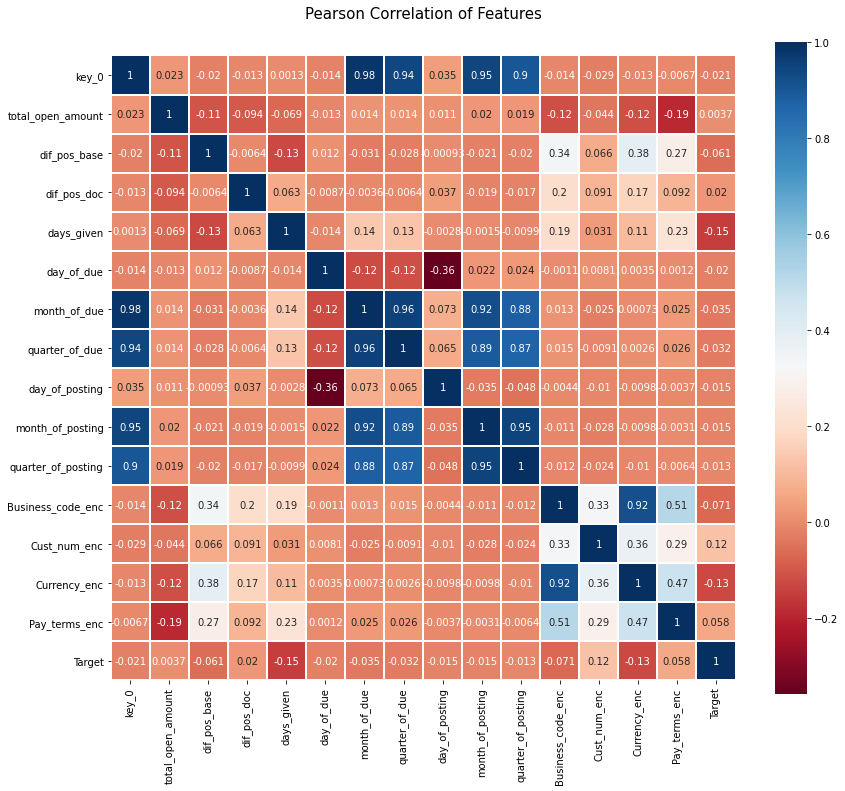

In [198]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

#### Creating a function to plot graphs

In [199]:
import scipy.stats as stats
def plots(df, column):
    plt.figure(figsize=(20,4))
    
    #Q-Q plot
    plt.subplot(1,4,1)
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title("QQ plot")
    plt.ylabel('Variable quantiles')
    
    #histogram
    plt.subplot(1,4,2)
    sns.distplot(df[column], bins=30)
    plt.title("histogram")
    
    #boxplot
    plt.subplot(1,4,3)
    sns.boxplot(y=df[column])
    plt.title("Boxplot")
    plt.show()
    
    #jointplot
    plt.subplot(1,4,4)
    sns.jointplot(x=df[column], y=df['Target'])
    plt.title("jointplot")
    plt.show()

***************key_0***************


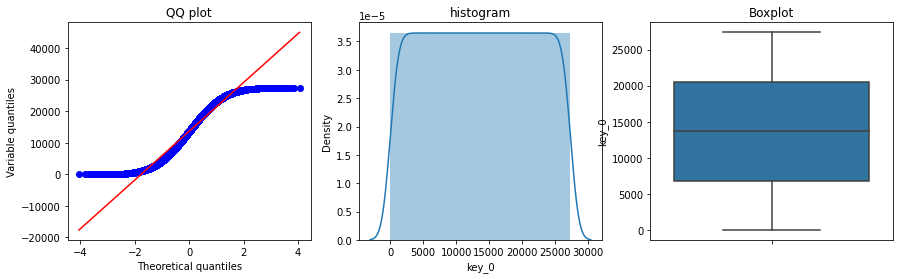

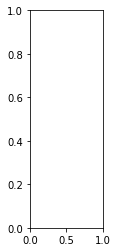

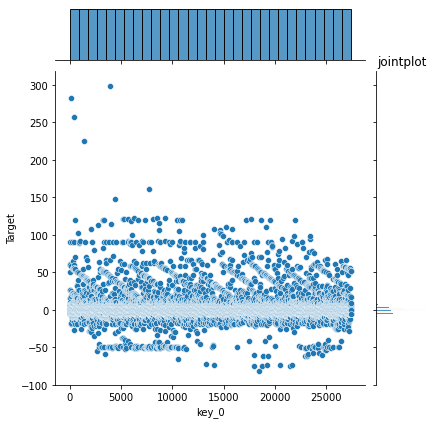

***************total_open_amount***************


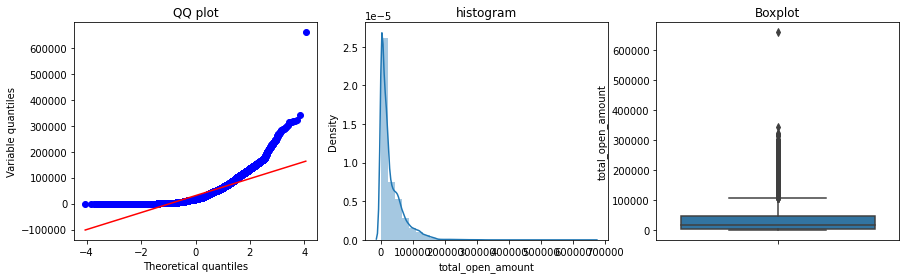

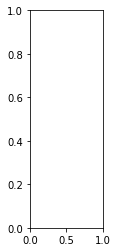

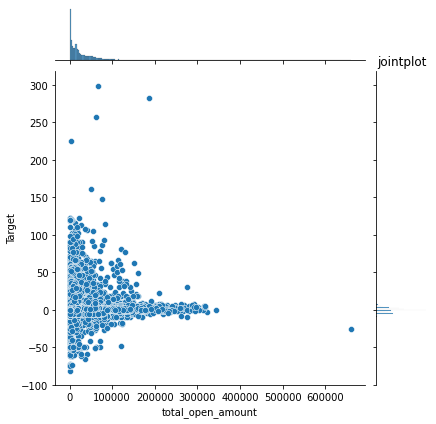

***************dif_pos_base***************


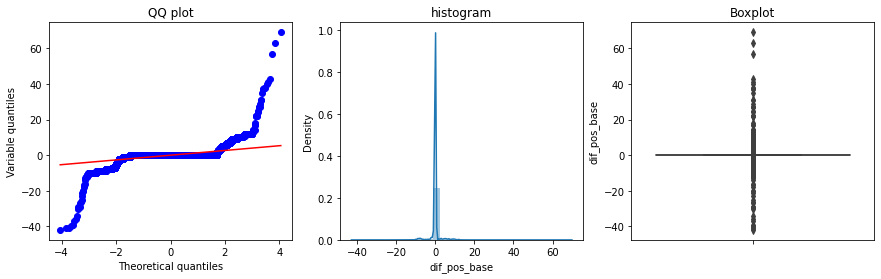

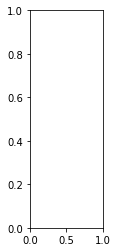

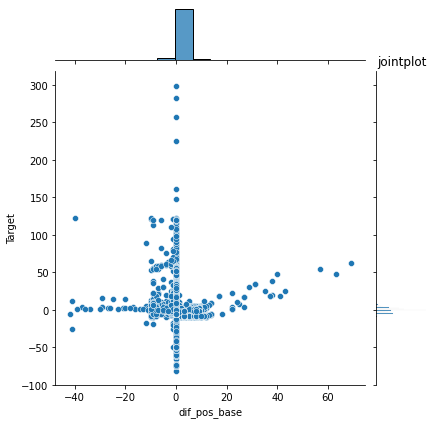

***************dif_pos_doc***************


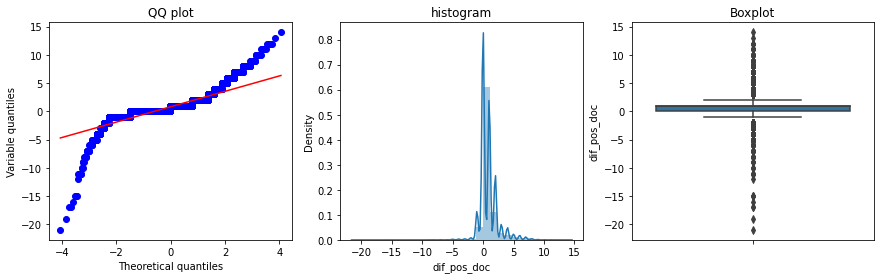

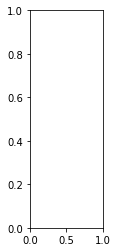

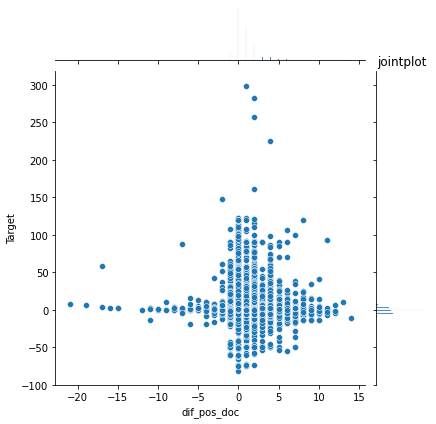

***************days_given***************


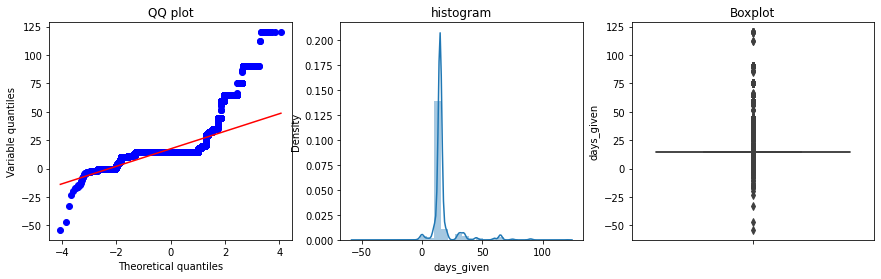

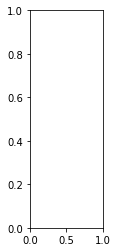

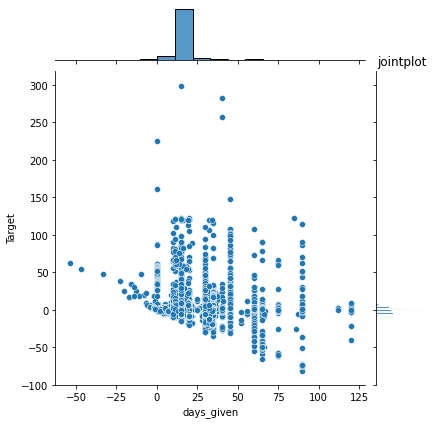

***************day_of_due***************


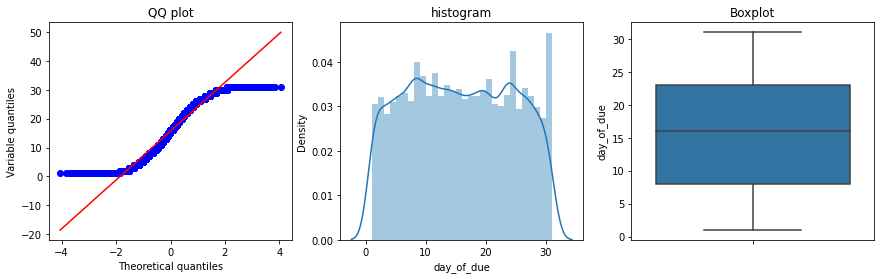

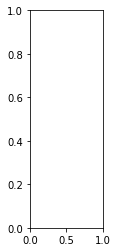

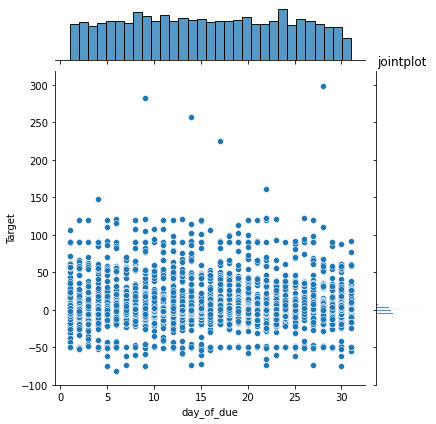

***************month_of_due***************


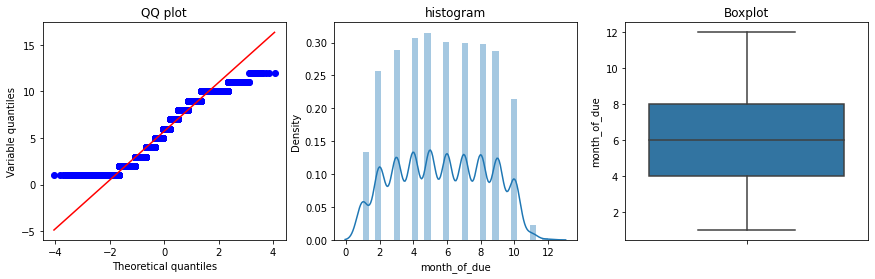

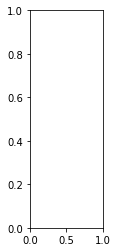

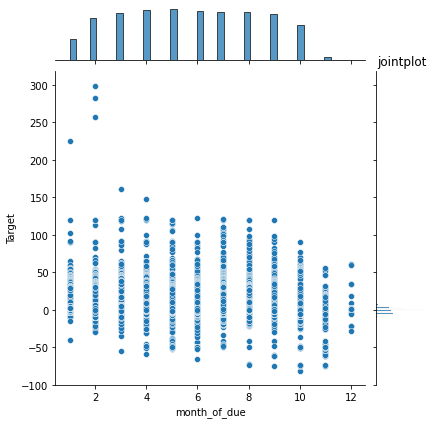

***************quarter_of_due***************


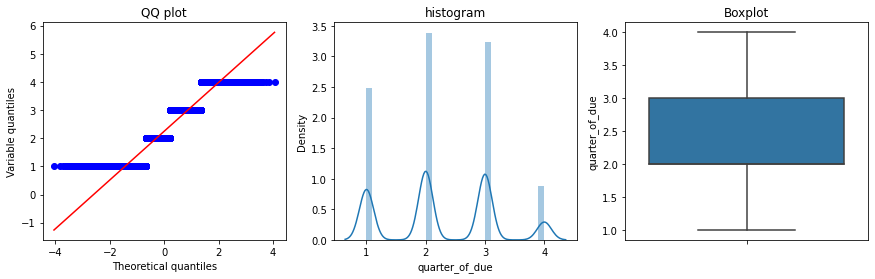

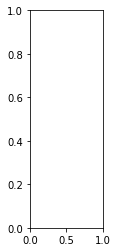

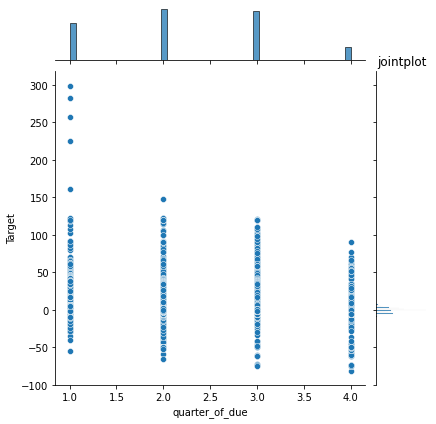

***************day_of_posting***************


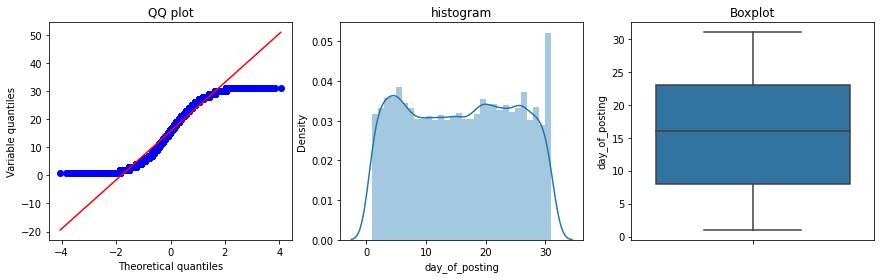

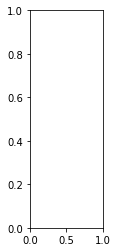

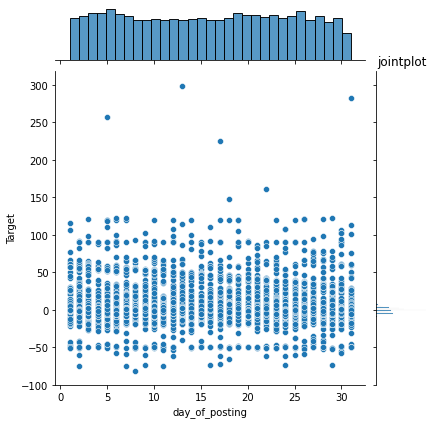

***************month_of_posting***************


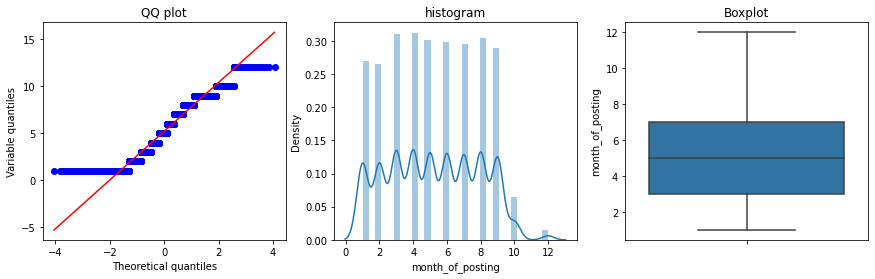

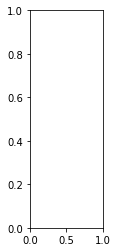

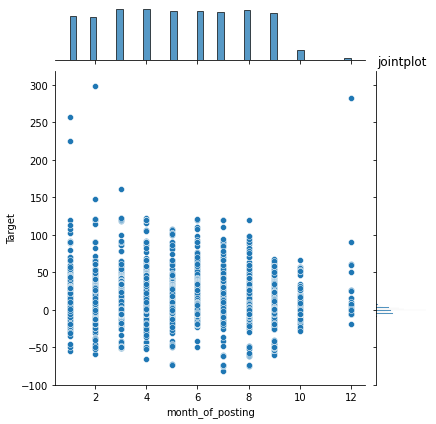

***************quarter_of_posting***************


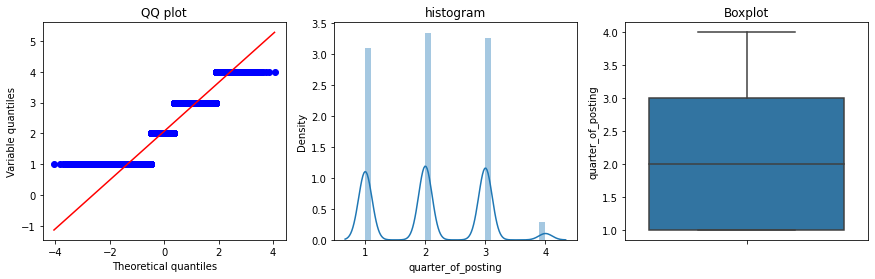

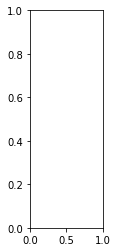

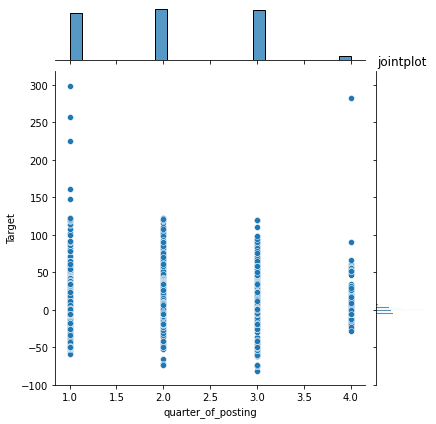

***************Business_code_enc***************


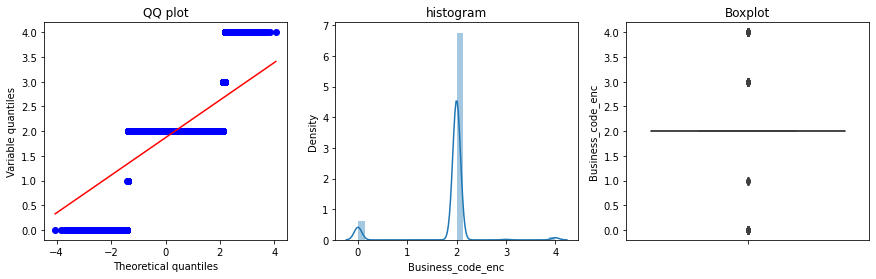

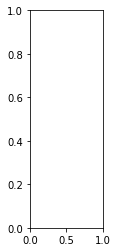

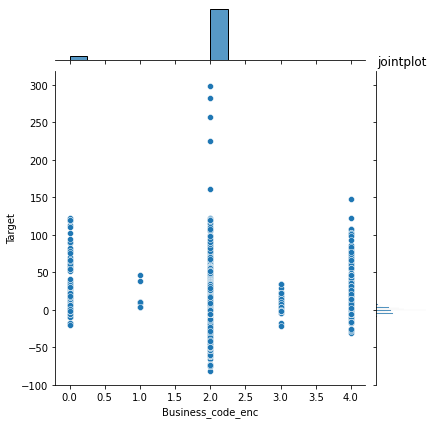

***************Cust_num_enc***************


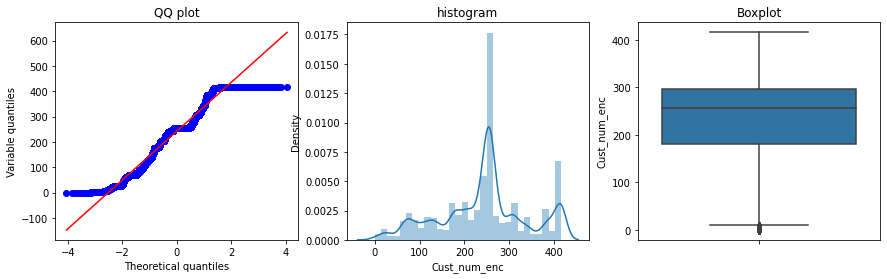

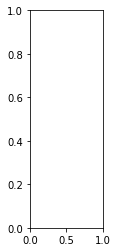

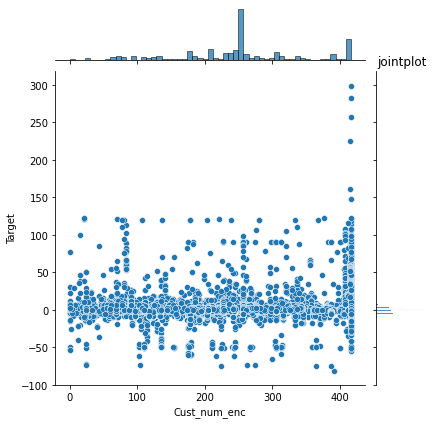

***************Currency_enc***************


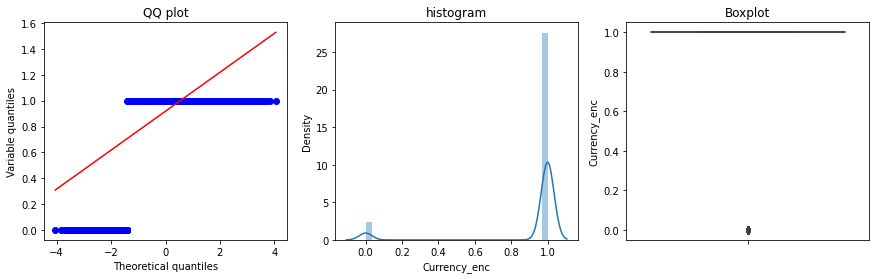

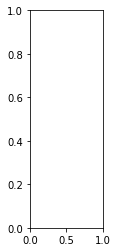

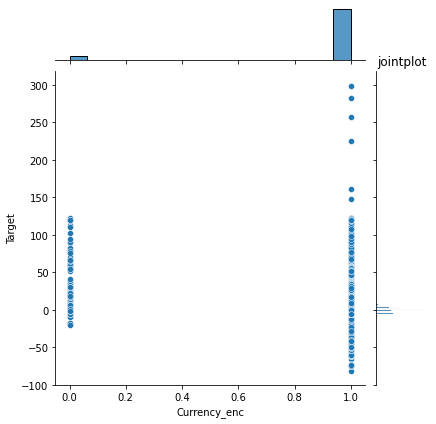

***************Pay_terms_enc***************


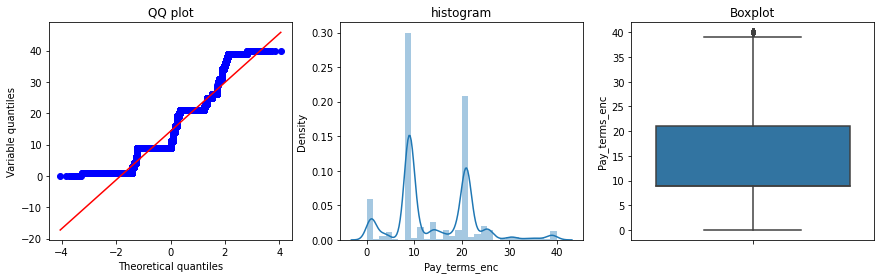

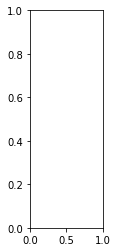

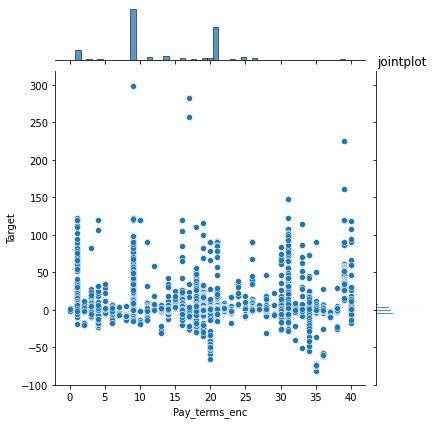

***************Target***************


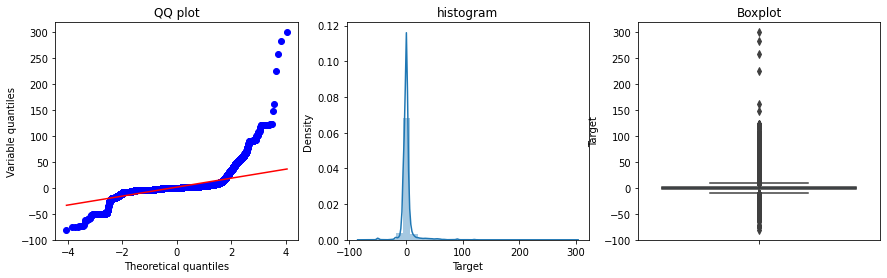

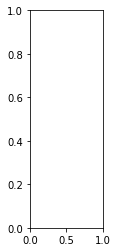

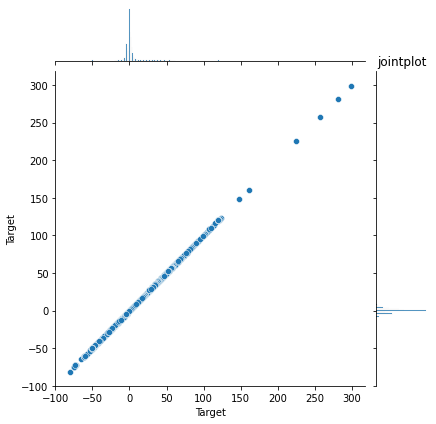

In [200]:
for col in X_train.merge(y_train , on = X_train.index ).columns: # all numerical columns
    print(f"***************{col}***************")
    plots(X_train.merge(y_train , on = X_train.index ),col)

In [201]:
# also since all the columns have been converted to int/ float , you can use variance threshold -- ;-D

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [202]:
sel.variances_

array([1.38395030e+09, 5.55625717e+00, 2.37606326e+00, 1.24766328e+02,
       7.49450299e+01, 7.17063134e+00, 8.62319281e-01, 7.92191755e+01,
       7.08310036e+00, 7.46411540e-01, 3.67711082e-01, 9.69377902e+03,
       7.46151933e-02, 6.80589839e+01])

In [203]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_open_amount   27398 non-null  float64
 1   dif_pos_base        27398 non-null  int64  
 2   dif_pos_doc         27398 non-null  int64  
 3   days_given          27398 non-null  int64  
 4   day_of_due          27398 non-null  int64  
 5   month_of_due        27398 non-null  int64  
 6   quarter_of_due      27398 non-null  int64  
 7   day_of_posting      27398 non-null  int64  
 8   month_of_posting    27398 non-null  int64  
 9   quarter_of_posting  27398 non-null  int64  
 10  Business_code_enc   27398 non-null  int32  
 11  Cust_num_enc        27398 non-null  int32  
 12  Currency_enc        27398 non-null  int32  
 13  Pay_terms_enc       27398 non-null  int32  
dtypes: float64(1), int32(4), int64(9)
memory usage: 3.7 MB
None
****************************
(27398, 14) (

## Modelling

#### Creating a base_model using Linear Regression


In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
        
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [223]:
y_predict = base_model.predict(X_train)

In [224]:
mean_squared_error(y_train, y_predict, squared=False)

11.327079037186373

In [226]:
r2_score(y_train, y_predict)

0.10593540648599886

In [230]:
y_predict = base_model.predict(X_val)

TypeError: float() argument must be a string or a number, not 'method'

In [232]:
X_val.head(2)

,total_open_amount,dif_pos_base,dif_pos_doc,days_given,day_of_due,month_of_due,quarter_of_due,day_of_posting,month_of_posting,quarter_of_posting,Business_code_enc,Cust_num_enc,Currency_enc,Pay_terms_enc
27398,7575.00000,0,4,60,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,6,10,4,4,50,1,28
27399,1679.55062,-1,0,11,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,6,10,4,0,91,0,1


There was a syntax error during the conversion of date of due and month of due and now since we don't have due date in our dataframe, we can undo this but thanks to the checkpoints where I saved the dataframes, I can reset the values in day_of_due using that dataframe.


In [233]:
val_cp4

,business_code,cust_number,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,dif_pos_base,dif_pos_doc,days_given,day_of_due,month_of_due,quarter_of_due,day_of_posting,month_of_posting,quarter_of_posting
27398,U013,0140103278,2019-10-06,2019-12-05,USD,7575.00000,2019-10-06,NAUZ,0,4,60,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,6,10,4
27399,CA02,0140106408,2019-10-06,2019-10-17,CAD,1679.55062,2019-10-07,CA10,-1,0,11,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,6,10,4
27400,U001,0200769623,2019-10-06,2019-10-21,USD,351.70000,2019-10-06,NAH4,0,0,15,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,6,10,4
27401,U001,0200769623,2019-10-06,2019-10-21,USD,17672.84000,2019-10-06,NAH4,0,1,15,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,6,10,4
27402,U001,0200769623,2019-10-06,2019-10-21,USD,49828.02000,2019-10-06,NAH4,0,-1,15,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,6,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33264,U001,0200793830,2019-12-08,2019-12-23,USD,135554.47000,2019-12-08,NAA8,0,-1,15,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,8,12,4
33265,U001,0200769623,2019-12-08,2019-12-23,USD,35125.92000,2019-12-08,NAH4,0,-1,15,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,8,12,4
33266,U001,0200707822,2019-12-08,2019-12-23,USD,64269.11000,2019-12-08,NAA8,0,-1,15,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,8,12,4
33267,U001,0200148860,2019-12-08,2019-12-23,USD,14776.32000,2019-12-08,NAA8,0,1,15,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,8,12,4


In [234]:
X_val['day_of_due'] = val_cp4['due_in_date'].dt.day
X_val['month_of_due'] = val_cp4['due_in_date'].dt.month


In [237]:
y_predict = base_model.predict(X_val)
#Now it's working

In [238]:
mean_squared_error(y_val, y_predict, squared=False)

6.390727411579541

In [239]:
r2_score(y_val, y_predict)

0.09025470611842545

In [240]:
y_predict = base_model.predict(X_test)

In [241]:
mean_squared_error(y_val, y_predict, squared=False)

7.538766384838247

In [242]:
r2_score(y_val, y_predict)

-0.26595946777345225

In [218]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 27397
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_open_amount   27398 non-null  float64
 1   dif_pos_base        27398 non-null  int64  
 2   dif_pos_doc         27398 non-null  int64  
 3   days_given          27398 non-null  int64  
 4   day_of_due          27398 non-null  int64  
 5   month_of_due        27398 non-null  int64  
 6   quarter_of_due      27398 non-null  int64  
 7   day_of_posting      27398 non-null  int64  
 8   month_of_posting    27398 non-null  int64  
 9   quarter_of_posting  27398 non-null  int64  
 10  Business_code_enc   27398 non-null  int32  
 11  Cust_num_enc        27398 non-null  int32  
 12  Currency_enc        27398 non-null  int32  
 13  Pay_terms_enc       27398 non-null  int32  
dtypes: float64(1), int32(4), int64(9)
memory usage: 3.7 MB


In [215]:
mean_squared_error(y_test, y_predict, squared=False)

9.411237824293345

In [220]:
r2_score(y_test, y_predict)

0.1362498883994585

In [329]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

In [336]:
MSE_Score.append(9.411237824293345)


In [338]:
R2_Score.append(0.1362498883994585)
Algorithm.append('Linear_Regression')

#### Support Vector Regression

In [339]:
from sklearn.svm import SVR

In [340]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_train)

In [341]:
print('train_mean',mean_squared_error(y_train, y_predict, squared=False))
print('train_score', r2_score(y_train, y_predict))

train_mean 12.033111150492989
train_score -0.008994714509959367


In [342]:
y_predict = svm_model.predict(X_val)
print('val_mean',mean_squared_error(y_val, y_predict, squared=False))
print('val_score', r2_score(y_val, y_predict))

val_mean 6.707410824263726
val_score -0.002141495172689689


In [343]:
y_predict = svm_model.predict(X_test)
print('test_mean',mean_squared_error(y_test, y_predict, squared=False))
print('test_score', r2_score(y_test, y_predict))

test_mean 10.129548970126551
test_score -0.0006330348954681764


In [344]:
MSE_Score.append(mean_squared_error(y_test, y_predict, squared=False))
R2_Score.append(r2_score(y_test, y_predict))
Algorithm.append('Support_vector_Regression')

#### Decision Tree Regressor

In [345]:
from sklearn.tree import DecisionTreeRegressor
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train, y_train)
y_predict = dtree_model.predict(X_train)
print('train_mean',mean_squared_error(y_train, y_predict, squared=False))
print('train_score', r2_score(y_train, y_predict))

train_mean 0.40668819054322586
train_score 0.9988474596001503


In [346]:
y_predict = dtree_model.predict(X_val)
print('val_mean',mean_squared_error(y_val, y_predict, squared=False))
print('val_score', r2_score(y_val, y_predict))

val_mean 9.456281803251056
val_score -0.9918656504518104


In [347]:
y_predict = dtree_model.predict(X_test)
print('test_mean',mean_squared_error(y_test, y_predict, squared=False))
print('test_score', r2_score(y_test, y_predict))

test_mean 12.936887403757373
test_score -0.6321280041171977


In [348]:
MSE_Score.append(mean_squared_error(y_test, y_predict, squared=False))
R2_Score.append(r2_score(y_test, y_predict))
Algorithm.append('Decision_tree_Regressor')

#### Random Forest Regressor

In [349]:
from sklearn.ensemble import RandomForestRegressor
rforest_model = RandomForestRegressor()
rforest_model.fit(X_train, y_train)
y_predict = rforest_model.predict(X_train)
print('train_mean',mean_squared_error(y_train, y_predict, squared=False))
print('train_score', r2_score(y_train, y_predict))


train_mean 3.5615224320536454
train_score 0.9116097417576347


In [350]:
y_predict = rforest_model.predict(X_val)
print('val_mean',mean_squared_error(y_val, y_predict, squared=False))
print('val_score', r2_score(y_val, y_predict))

val_mean 6.879584641412601
val_score -0.05425013880827345


In [351]:
y_predict = rforest_model.predict(X_test)
print('test_mean',mean_squared_error(y_test, y_predict, squared=False))
print('test_score', r2_score(y_test, y_predict))

test_mean 8.64656557317183
test_score 0.27090872897722407


In [352]:
MSE_Score.append(mean_squared_error(y_test, y_predict, squared=False))
R2_Score.append(r2_score(y_test, y_predict))
Algorithm.append('Decision_tree_Regressor')

#### XGB Regressor

In [354]:
import xgboost as xgb

In [355]:
from sklearn.ensemble import RandomForestRegressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_train)
print('train_mean',mean_squared_error(y_train, y_predict, squared=False))
print('train_score', r2_score(y_train, y_predict))

train_mean 5.632822361426247
train_score 0.7789018313247302


In [356]:
y_predict = xgb_model.predict(X_val)
print('val_mean',mean_squared_error(y_val, y_predict, squared=False))
print('val_score', r2_score(y_val, y_predict))

val_mean 7.946826588158191
val_score -0.40671689233018826


In [357]:
y_predict = xgb_model.predict(X_test)
print('test_mean',mean_squared_error(y_test, y_predict, squared=False))
print('test_score', r2_score(y_test, y_predict))

test_mean 9.044432787012926
test_score 0.20226748985706966


In [358]:
MSE_Score.append(mean_squared_error(y_test, y_predict, squared=False))
R2_Score.append(r2_score(y_test, y_predict))
Algorithm.append('XGB_Regressor')

In [359]:
#Combining the Lists into a DataFrame for a Better Visualisation
Score_card = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [360]:
Score_card

,Algorithm,MSE_Score,R2_Score
0,Linear_Regression,9.411238,0.136250
1,Support_vector_Regression,10.129549,-0.000633
2,Decision_tree_Regressor,12.936887,-0.632128
3,Decision_tree_Regressor,8.646566,0.270909
4,XGB_Regressor,9.044433,0.202267


###### Till now none of the scores looks satisfiable

In tree based models there were cases of overfitting, HPT(hyper parameter tuning) can probably fix it

## HPT

#### Decision Tree

In [415]:
dtree_model2 = DecisionTreeRegressor(random_state= 0 , max_depth= 7, criterion = 'mae')
dtree_model2.fit(X_train, y_train)
y_predict = dtree_model2.predict(X_train)
print('train_mean',mean_squared_error(y_train, y_predict, squared=False))
print('train_score', r2_score(y_train, y_predict))

train_mean 9.728329427983851
train_score 0.3405079391275886


In [416]:
y_predict = dtree_model2.predict(X_val)
print('val_mean',mean_squared_error(y_val, y_predict, squared=False))
print('val_score', r2_score(y_val, y_predict))

val_mean 5.388417683988003
val_score 0.35324210950189217


In [ ]:
#Steps performed
#--> Tuned max depth 6 works best
#-->Then test different criterion and with mae, max depth of 7 works best


Now let's see how well this performs on test set

In [417]:
y_predict = dtree_model2.predict(X_test)
print('test_mean',mean_squared_error(y_test, y_predict, squared=False))
print('test_score', r2_score(y_test, y_predict))

test_mean 8.345622857660347
test_score 0.3207773972649074


In [418]:
MSE_Score.append(mean_squared_error(y_test, y_predict, squared=False))
R2_Score.append(r2_score(y_test, y_predict))
Algorithm.append('Decision_tree_2')

Since the values are comparable let's mover on to next model

#### Random Forest

In [574]:
rforest_model2 = RandomForestRegressor(n_estimators = 50, max_depth=6, min_impurity_decrease=0.22, random_state= 0)
rforest_model2.fit(X_train, y_train)
y_predict = rforest_model2.predict(X_train)
print('train_mean',mean_squared_error(y_train, y_predict, squared=False))
print('train_score', r2_score(y_train, y_predict))


train_mean 8.87689304509087
train_score 0.4508954921185302


In [575]:
y_predict = rforest_model2.predict(X_val)
print('val_mean',mean_squared_error(y_val, y_predict, squared=False))
print('val_score', r2_score(y_val, y_predict))

val_mean 5.101931332744354
val_score 0.42018633232199765


In [576]:
#Steps performed
#--> Tuned max depth 5 works best
#-->min_impurity_decrease of 0.22 also adds
#--> n_estimators at 50


Now lets test this on test dataframe

In [577]:
y_predict = rforest_model2.predict(X_test)
print('test_mean',mean_squared_error(y_test, y_predict, squared=False))
print('test_score', r2_score(y_test, y_predict))

test_mean 7.684334209478349
test_score 0.42415299808561746


In [578]:
MSE_Score.append(mean_squared_error(y_test, y_predict, squared=False))
R2_Score.append(r2_score(y_test, y_predict))
Algorithm.append('Random_forest_Regressor2')

#### XGB Regressor

In [699]:
xgb_model2 = xgb.XGBRegressor(n_estimators=5, max_depth=6, base_score = 2)
xgb_model2.fit(X_train, y_train)
y_predict = xgb_model2.predict(X_train)
print('train_mean',mean_squared_error(y_train, y_predict, squared=False))
print('train_score', r2_score(y_train, y_predict))

train_mean 8.852143629161505
train_score 0.4539531094210594


In [695]:
y_predict = xgb_model2.predict(X_val)
print('val_mean',mean_squared_error(y_val, y_predict, squared=False))
print('val_score', r2_score(y_val, y_predict))

val_mean 5.041462812894938
val_score 0.4338488856387368


In [696]:
#Steps performed
#--> Tuned max depth 6 works best
#-->base_score =2
#--> n_estimators at 5
#--

lets transform the test set now

In [701]:
y_predict = xgb_model2.predict(X_test)
print('test_mean',mean_squared_error(y_test, y_predict, squared=False))
print('test_score', r2_score(y_test, y_predict))

test_mean 7.68306075129844
test_score 0.42434384254704527


In [702]:
MSE_Score.append(mean_squared_error(y_test, y_predict, squared=False))
R2_Score.append(r2_score(y_test, y_predict))
Algorithm.append('XGB_Regressor2')


In [703]:
#Score_card
Score_card = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

## Accuracy

In [704]:
Score_card

,Algorithm,MSE_Score,R2_Score
0,Linear_Regression,9.411238,0.136250
1,Support_vector_Regression,10.129549,-0.000633
2,Decision_tree_Regressor,12.936887,-0.632128
3,Decision_tree_Regressor,8.646566,0.270909
4,XGB_Regressor,9.044433,0.202267
5,Decision_tree_2,8.345623,0.320777
6,Random_forest_Regressor2,7.684334,0.424153
7,XGB_Regressor2,7.683061,0.424344


In the new models R2 score has improved

In [557]:
# Now i am adding days_given column in the test, val and train sets

In [439]:
X_train['days_given'] = (train_cp4['due_in_date'] - train_cp4['posting_date']).dt.days
X_val['days_given'] = (val_cp4['due_in_date'] - val_cp4['posting_date']).dt.days
X_test['days_given'] = (test_cp4['due_in_date'] - test_cp4['posting_date']).dt.days


In [268]:
base_model2 = LinearRegression()
base_model2.fit(X_train, y_train)
y_predict = base_model2.predict(X_train)
print(mean_squared_error(y_train, y_predict, squared=False))
print(r2_score(y_train, y_predict))

11.327079037186373
0.10593540648599886


y_predict = base_model.predict(X_val)
mean_squared_error(y_val, y_predict, squared=False)
r2_score(y_val, y_predict)

## The Real test

In [746]:
real_test = pd.read_csv('Real_test.csv')

In [747]:
real_test.head()

,Unnamed: 0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,1,U001,0200761734,H E BUT trust,NaN,2020.0,1.930795e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,18387.34,20200417.0,NAA8,1.930795e+09,1
1,4,U001,0200435191,C& systems,NaN,2020.0,1.930863e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,29525.84,20200507.0,NAC6,1.930863e+09,1
2,9,U001,0200418007,AM trust,NaN,2020.0,1.930653e+09,2020-03-19,20200314,20200319,20200403.0,USD,RV,1.0,3427.20,20200319.0,NAA8,1.930653e+09,1
3,10,U001,0200418007,AM llc,NaN,2020.0,1.930683e+09,2020-03-24,20200321,20200324,20200408.0,USD,RV,1.0,3336.76,20200324.0,NAA8,1.930683e+09,1
4,15,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930717e+09,2020-03-29,20200330,20200329,20200413.0,USD,RV,1.0,25481.16,20200329.0,NAH4,1.930717e+09,1


Here till this point we have:

A model i.e regressor

real_test

some encoders to map i.e business_code_enc etc

we have to predict the delay using the model and fill it up in the delay column and then bucketize the results

In [748]:
real_test.isnull().sum()

Unnamed: 0                    0
business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [749]:
#dropping clear_date as its null only
real_test.drop(columns =['Unnamed: 0','clear_date'], inplace =True)

In [750]:
#Datetime conversions

real_test['posting_date'] = pd.to_datetime(real_test['posting_date'])
real_test['document_create_date'] = pd.to_datetime(real_test['document_create_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')

real_test['document_create_date.1'] = pd.to_datetime(real_test['document_create_date.1'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
real_test['due_in_date'] = pd.to_datetime(real_test['due_in_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
real_test['baseline_create_date'] = pd.to_datetime(real_test['baseline_create_date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')




In [751]:
real_test['document_create_date'] = pd.to_datetime(real_test['document_create_date'])
real_test['document_create_date.1'] = pd.to_datetime(real_test['document_create_date.1'])
real_test['due_in_date'] = pd.to_datetime(real_test['due_in_date'])
real_test['baseline_create_date'] = pd.to_datetime(real_test['baseline_create_date'])

In [752]:
real_test.duplicated().sum()

291

In [753]:
real_test = real_test.drop_duplicates(keep = 'first')
real_test.shape

(9709, 17)

In [754]:
#dropping the similar &constant columns, also id columns

real_test.drop(columns = ['doc_id', 'invoice_id', 'posting_id', 'document_create_date.1'], inplace = True)

In [755]:
real_test.drop(columns=['isOpen', 'document type'], inplace =True)

In [756]:
real_test['total_open_amount'] = np.where(real_test['invoice_currency'] == 'CAD',real_test['total_open_amount'] *0.814 ,
                                           real_test['total_open_amount'])

In [757]:
#Now will sort the dataframe w.r.t. posting date

real_test.sort_values(by = 'posting_date' , inplace =True)
real_test.reset_index(drop= True, inplace =True)

In [758]:
real_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'posting_date', 'document_create_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

In [761]:
real_test.drop(columns = ['name_customer', 'buisness_year'], inplace =True)

In [762]:
real_test['dif_pos_base'] = (real_test['posting_date'] - real_test['baseline_create_date']).dt.days
real_test['dif_pos_doc'] = (real_test['posting_date'] - real_test['document_create_date']).dt.days
real_test['days_given'] = (real_test['due_in_date'] - real_test['posting_date']).dt.days



In [763]:
real_test['day_of_due'] = real_test['due_in_date'].dt.day
real_test['month_of_due'] = real_test['due_in_date'].dt.month
real_test['quarter_of_due'] = real_test['due_in_date'].dt.quarter


In [764]:
#extracting day,month and quarter 

real_test['day_of_posting'] = real_test['posting_date'].dt.day
real_test['month_of_posting'] = real_test['posting_date'].dt.month
real_test['quarter_of_posting'] = real_test['posting_date'].dt.quarter

In [765]:
real_test.columns

Index(['business_code', 'cust_number', 'posting_date', 'document_create_date',
       'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'dif_pos_base',
       'dif_pos_doc', 'days_given', 'day_of_due', 'month_of_due',
       'quarter_of_due', 'day_of_posting', 'month_of_posting',
       'quarter_of_posting'],
      dtype='object')

In [766]:
real_test.drop(columns = ['document_create_date', 'posting_date','due_in_date', 'baseline_create_date' ], inplace =True)


In [767]:
temp = set(real_test['business_code'])-set(business_code_encoder.classes_)
for items in temp:
    business_code_encoder.classes_= np.append(business_code_encoder.classes_,items)

real_test['Business_code_enc'] = business_code_encoder.transform(real_test['business_code'])

In [768]:
temp = set(real_test['cust_number'])-set(cust_num_encoder.classes_)
for items in temp:
    cust_num_encoder.classes_= np.append(cust_num_encoder.classes_,items)

real_test['Cust_num_enc'] = cust_num_encoder.transform(real_test['cust_number'])

In [769]:
temp = set(real_test['invoice_currency'])-set(currency_encoder.classes_)
for items in temp:
    currency_encoder.classes_= np.append(currency_encoder.classes_,items)

real_test['Currency_enc'] = currency_encoder.transform(real_test['invoice_currency'])

In [770]:
temp = set(real_test['cust_payment_terms'])-set(payment_terms_encoder.classes_)
for items in temp:
    payment_terms_encoder.classes_= np.append(payment_terms_encoder.classes_,items)

real_test['Pay_terms_enc'] = payment_terms_encoder.transform(real_test['cust_payment_terms'])

In [771]:
real_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       9709 non-null   object 
 1   cust_number         9709 non-null   object 
 2   invoice_currency    9709 non-null   object 
 3   total_open_amount   9709 non-null   float64
 4   cust_payment_terms  9709 non-null   object 
 5   dif_pos_base        9709 non-null   int64  
 6   dif_pos_doc         9709 non-null   int64  
 7   days_given          9709 non-null   int64  
 8   day_of_due          9709 non-null   int64  
 9   month_of_due        9709 non-null   int64  
 10  quarter_of_due      9709 non-null   int64  
 11  day_of_posting      9709 non-null   int64  
 12  month_of_posting    9709 non-null   int64  
 13  quarter_of_posting  9709 non-null   int64  
 14  Business_code_enc   9709 non-null   int32  
 15  Cust_num_enc        9709 non-null   int32  
 16  Curren

In [772]:
real_test.drop(columns = ['cust_number', 'invoice_currency', 'cust_payment_terms'], inplace =True)

In [773]:
real_test.drop('business_code',axis=1, inplace=True)

In [776]:
real_test.columns

Index(['total_open_amount', 'dif_pos_base', 'dif_pos_doc', 'days_given',
       'day_of_due', 'month_of_due', 'quarter_of_due', 'day_of_posting',
       'month_of_posting', 'quarter_of_posting', 'Business_code_enc',
       'Cust_num_enc', 'Currency_enc', 'Pay_terms_enc'],
      dtype='object')

In [777]:
X_train.columns

Index(['total_open_amount', 'dif_pos_base', 'dif_pos_doc', 'day_of_due',
       'month_of_due', 'quarter_of_due', 'day_of_posting', 'month_of_posting',
       'quarter_of_posting', 'Business_code_enc', 'Cust_num_enc',
       'Currency_enc', 'Pay_terms_enc', 'days_given'],
      dtype='object')

#### Final Result

In [775]:
final_delay = xgb_model2.predict(real_test)

In [778]:
final_delay = pd.Series(final_delay,name='delay')

In [779]:
# resetting the index of real test so that we can merge price series with it
real_test.reset_index(drop=True,inplace=True)

In [780]:
Final = real_test.merge(final_delay , on =real_test.index )
Final 

,key_0,total_open_amount,dif_pos_base,dif_pos_doc,days_given,day_of_due,month_of_due,quarter_of_due,day_of_posting,month_of_posting,quarter_of_posting,Business_code_enc,Cust_num_enc,Currency_enc,Pay_terms_enc,delay
0,0,12179.2800,0,0,15,13,3,1,27,2,1,2,227,1,9,3.372063
1,1,7883.9100,0,1,15,13,3,1,27,2,1,2,256,1,21,1.791634
2,2,7359.5300,0,0,20,18,3,1,27,2,1,2,342,1,16,2.238880
3,3,15010.3800,0,1,35,2,4,2,27,2,1,2,412,1,19,2.238880
4,4,45602.8900,0,0,15,13,3,1,27,2,1,2,256,1,21,1.791634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,9704,4765.8072,0,0,10,25,5,2,15,5,2,0,432,0,1,6.795108
9705,9705,39911.7400,0,0,15,30,5,2,15,5,2,2,592,1,9,3.058237
9706,9706,16728.0256,0,0,0,16,5,2,16,5,2,0,687,0,46,-3.524016
9707,9707,2930.4000,0,0,0,19,5,2,19,5,2,0,687,0,46,-3.524016


In [781]:
bins = [0,15,30,45,60,75,90,600]
category = ['0-15','16-30','31-45','46-60','61-75','76-90','90+']

In [782]:
Final['bucket_range'] = pd.cut(Final['delay'], bins, labels = category)

In [787]:
Final.to_csv('Final_result.csv')

## Delay is predicted

# Milestone - 3 achieved

THE END

###### But as they ending is just a new begining

This model has a lot of scope for improvement.

Some of the methods to explore are:

    1) Using days_given as one of the feature
    
    2) Eliminating the outliers from the total_amount
    
    3) Using categorical columns to classify instead of using int columns
    
    4) Using dummy variables to create multiple columns for categorical features (which would require a little bit more memory and faster processor)
    
    5)Exploring different regression models and ddjusting Hyperparameters.